### Tarea 1


Hacer dos figuras de circulación zonal (u) y meridional (v) en alta (200 hPa) y baja (800 hPa) atmósfera para los meses de diciembre, enero y febrero en Sudamérica, utilizando datos de reanálisis ERA5.

In [2]:
# Import libreries
import xarray as xr
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 1. operating Dataset.


In [3]:
# Opening the dataset
ERA_5 = xr.open_dataset(r'C:\Users\nicol\Desktop\Articulo\TAREAS\3. Visualizacion de datos\Archivos NC\ERA 5.nc', chunks=-1)
ERA_5

c:\Users\nicol\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<xarray.Dataset>
Dimensions:    (longitude: 261, latitude: 221, level: 37, time: 251)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -25.5 -25.25 -25.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -39.5 -39.75 -40.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2023-02-01
Data variables:
    z          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    q          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    u          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    v          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
    w          (time, level, latitude, longitude) float32 dask.array<chunksize=(251, 37, 221, 261), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-20 16:11:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [5]:
# Declaring the variable within the desired time range
ERA_5_1951_2021 = ERA_5.sel(
    time=slice('1950-12-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000')
)
ERA_5_1951_2021

<xarray.Dataset>
Dimensions:    (longitude: 261, latitude: 221, level: 37, time: 213)
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -25.5 -25.25 -25.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -39.5 -39.75 -40.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1950-12-01 1951-01-01 ... 2021-02-01
Data variables:
    z          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    q          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    u          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    v          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
    w          (time, level, latitude, longitude) float32 dask.array<chunksize=(213, 37, 221, 261), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-20 16:11:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [5]:
# Multiplying by 100 to avoid decimal values.
# Following the methodology of Segura et al. (2020).
w_mean = ERA_5_1950_2021['w'].mean(dim="time") * 100
# Converting from kg to g, water per kg of air.
q_mean = ERA_5_1950_2021['q'].mean(dim="time") * 1000
u_mean = ERA_5_1950_2021['u'].mean(dim="time")
v_mean = ERA_5_1950_2021['v'].mean(dim="time")
w_mean


<xarray.DataArray 'w' (level: 37, latitude: 221, longitude: 261)>
dask.array<mul, shape=(37, 221, 261), dtype=float32, chunksize=(37, 221, 261), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -90.0 -89.75 -89.5 ... -25.5 -25.25 -25.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -39.5 -39.75 -40.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000

In [6]:
# Variables to be used for visualization
x, y = ERA_5_1950_2021['longitude'], ERA_5_1950_2021['latitude']
REGION = [-90, -25, -40, 15]

In [12]:
def obtainLevel(levelSearched, data):
    """
    Esta funcion busca el indice al que pertenece x nivel de presion
    :param levelSearched = nivel buscado
    :param data = dataset en el que se busca el nivel
    :return retorna el indice donde se encuentra el nivel en el dataset.    
    """
    index = np.where(data.level == levelSearched)[0][0]
    return index


# Obtenemos los indices de los niveles de presion de 200, 500 y 800.
level200 = obtainLevel(200, ERA_5_1950_2021)
level500 = obtainLevel(500, ERA_5_1950_2021)
level800 = obtainLevel(800, ERA_5_1950_2021)

In [22]:

# U y V a niveles de presion de 200 hPa.
U200 = u_mean[level200, :, :]
V200 = v_mean[level200, :, :]
# U y V a niveles de presion de 800 hPa.
U800 = u_mean[level800, :, :]
V800 = v_mean[level800, :, :]
# W y Q a niveles de presion de 500 hPa.
Q_500 = q_mean[level500, :, :]
W_500 = w_mean[level500, :, :]

### 2. Vientos verticales

c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'rasterized'
  result = super().contourf(*args, **kwargs)
c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


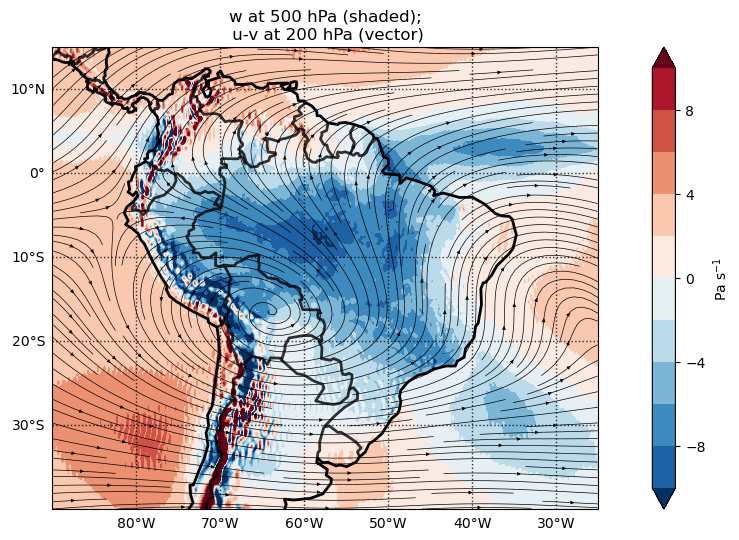

In [24]:
fig, axs = plt.subplots(
    subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(14, 6))

# Plot w_mean at 500 hPa as an image
w_500 = W_500.plot.contourf(
    add_colorbar=False,  # Colorbar
    robust=True,  # Use 98th and 2nd percentiles for color range
    cmap="RdBu_r",  # Color map
    levels=np.arange(-10, 11, 2),  # Levels for coloring the map
    rasterized=True,  # Separate objects
    alpha=1,  # Transparency
    # interpolation='none'  # No interpolation (pixelated)
)

# Add streamlines of u and v variables at 200 hPa
axs.streamplot(x, y, U200, V200,
               linewidth=0.5,  # Tail size of arrows
               arrowsize=0.5,  # Head size of arrows
               density=2,  # Arrow density
               color='k',  # Color
               transform=ccrs.PlateCarree())

axs.coastlines(color='k', linewidth=2)  # Add coastlines
axs.add_feature(cfeature.BORDERS, linestyle="-", color='k',
                alpha=0.8, linewidth=2)  # Add borders

axs.gridlines(draw_labels=["left", "bottom"],  # Position of grid labels
              linewidth=1,  # Gridline size
              color='k',  # Gridline color
              alpha=0.8,  # Transparency
              linestyle=':')  # Gridline style

axs.set_extent(REGION, crs=ccrs.PlateCarree())  # Set the displayed region

cb = fig.colorbar(w_500, ax=axs, extend="both",
                  orientation="vertical", label="Pa s$^{-1}$")  # Colorbar settings
cb.set_ticks((np.arange(-8, 9, 4)))  # Set colorbar ticks
cb.minorticks_off()  # Disable minor ticks on colorbar

# Set the plot title
plt.title("w at 500 hPa (shaded);\n u-v at 200 hPa (vector)")
plt.savefig("Circulacion_200_Corregido_V1.svg", bbox_inches='tight')  # Save the plot as an SVG file
plt.savefig("Circulacion_200_Corregido_V1.png", bbox_inches='tight')  # Save the plot as a PNG file


### 3. HUMEDAD ESPECIFICA

c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


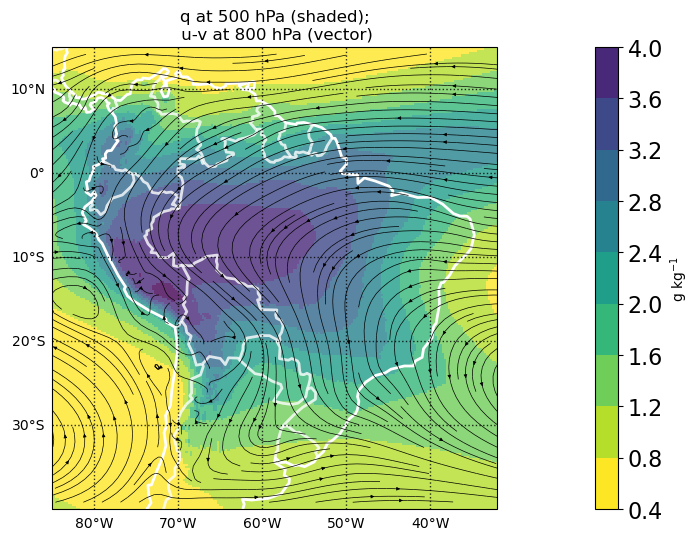

In [25]:
fig, axs = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(14, 6))

# Plot vertical wind levels
q_plot = Q_500.plot(
    add_colorbar=False,  # Add colorbar
    robust=True,  # Use 98th and 2nd percentiles for color range
    cmap="viridis_r",  # Color map
    levels=12,  # Levels for coloring
    rasterized=True,
    alpha=1
)

# Streamplot for arrows
axs.streamplot(x, y, U800, V800,
               linewidth=0.5,  # Line width
               arrowsize=0.5,  # Arrow size
               density=2,  # Density of lines
               color='k',  # Color
               transform=ccrs.PlateCarree()  # Coordinate transformation
               )

# Add coastlines and borders
axs.coastlines(linewidth=2, color='white')
axs.add_feature(cfeature.BORDERS, linestyle="-",
                color='white', alpha=0.8, linewidth=2)

# Add gridlines
axs.gridlines(draw_labels=["left", "bottom"],
              linewidth=1,
              color='k',
              alpha=0.8,
              linestyle=':')

# Set the extent of the image
axs.set_extent([-85, -32, -40, 15], crs=ccrs.PlateCarree())

# Add colorbar
cb = fig.colorbar(q_plot,
                  ax=axs,
                  pad=0.09,
                  extend="neither",
                  orientation="vertical",
                  label='g kg$^{-1}$'
                  )

# Set colorbar label size
cb.ax.tick_params(labelsize=16)
q_plot.set_alpha(0.8)
plt.title('q at 500 hPa (shaded);\n u-v at 800 hPa (vector)')

# Save the file
plt.savefig("Circulacion_800_Corregido_V1.svg", bbox_inches='tight')
plt.savefig("Circulacion_800_Corregido_V1.png", bbox_inches='tight')
